In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from io import StringIO

In [2]:
# --- 1. Load the Dataset ---
# The dataset content is provided directly, so we'll use StringIO to read it.
csv_content = """CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
11,Male,67,19,14
12,Female,35,19,99
13,Female,58,20,15
14,Female,24,20,77
15,Male,37,20,13
16,Male,22,20,79
17,Female,35,21,35
18,Male,20,21,66
19,Male,52,23,29
20,Female,35,23,98
21,Male,35,24,35
22,Male,25,24,73
23,Female,46,25,5
24,Male,31,25,73
25,Female,54,28,14
26,Male,29,28,82
27,Female,45,28,32
28,Male,35,28,61
29,Female,40,29,31
30,Female,23,29,87
31,Male,60,30,4
32,Female,21,30,73
33,Male,53,33,4
34,Male,18,33,92
35,Female,49,33,14
36,Female,21,33,81
37,Female,42,34,17
38,Female,30,34,73
39,Female,36,37,26
40,Female,20,37,75
41,Female,65,38,35
42,Male,24,38,92
43,Male,48,39,36
44,Female,31,39,61
45,Female,49,39,28
46,Female,24,39,65
47,Female,50,40,55
48,Female,27,40,47
49,Female,29,40,42
50,Female,31,40,42
51,Female,49,42,52
52,Male,33,42,60
53,Female,31,43,54
54,Male,59,43,60
55,Female,50,43,45
56,Male,47,43,41
57,Female,51,44,50
58,Male,69,44,46
59,Female,27,46,51
60,Male,53,46,46
61,Male,70,46,56
62,Male,19,46,55
63,Female,67,47,52
64,Female,54,47,59
65,Male,63,48,51
66,Male,18,48,59
67,Female,43,48,50
68,Female,68,48,48
69,Male,19,48,59
70,Female,32,48,47
71,Male,70,49,55
72,Female,47,49,42
73,Female,60,50,49
74,Female,60,50,56
75,Male,59,54,47
76,Male,26,54,54
77,Female,45,54,53
78,Male,40,54,48
79,Female,23,54,52
80,Female,49,54,42
81,Male,57,54,51
82,Male,38,54,55
83,Male,67,54,41
84,Female,46,54,44
85,Female,21,54,57
86,Male,48,54,46
87,Female,55,57,58
88,Female,22,57,55
89,Female,34,58,60
90,Female,50,58,46
91,Female,68,59,55
92,Male,18,59,41
93,Male,48,60,49
94,Female,40,60,40
95,Female,32,60,42
96,Male,24,60,52
97,Female,47,60,47
98,Female,27,60,50
99,Male,48,61,42
100,Male,20,61,49
101,Female,23,62,41
102,Female,49,62,48
103,Male,67,62,59
104,Male,26,62,55
105,Male,49,62,56
106,Female,21,62,42
107,Female,66,63,50
108,Male,54,63,46
109,Male,68,63,43
110,Male,66,63,48
111,Male,65,63,52
112,Female,19,63,54
113,Female,38,64,42
114,Male,19,64,46
115,Female,18,65,48
116,Female,19,65,50
117,Female,63,65,43
118,Female,49,65,59
119,Female,51,67,43
120,Female,50,67,57
121,Male,27,67,56
122,Female,38,67,40
123,Female,40,69,58
124,Male,39,69,91
125,Female,23,70,29
126,Female,31,70,77
127,Male,43,71,35
128,Male,40,71,95
129,Male,59,71,11
130,Male,38,71,75
131,Male,47,71,9
132,Male,39,71,75
133,Female,25,72,34
134,Female,31,72,71
135,Male,20,73,5
136,Female,29,73,88
137,Female,44,73,7
138,Male,32,73,73
139,Male,19,74,10
140,Female,35,74,72
141,Female,57,75,5
142,Male,32,75,93
143,Female,28,76,40
144,Female,32,76,87
145,Male,25,77,12
146,Male,28,77,97
147,Male,48,77,36
148,Female,32,77,74
149,Female,34,78,22
150,Male,34,78,90
151,Male,43,78,17
152,Male,39,78,88
153,Female,44,78,20
154,Female,38,78,76
155,Female,47,78,16
156,Female,27,78,89
157,Male,37,78,1
158,Female,30,78,78
159,Male,34,78,1
160,Female,30,78,73
161,Female,56,79,35
162,Female,29,79,83
163,Male,19,81,5
164,Female,31,81,93
165,Male,50,85,26
166,Female,36,85,75
167,Male,42,86,20
168,Female,33,86,95
169,Female,36,87,27
170,Male,32,87,63
171,Male,40,87,13
172,Male,28,87,75
173,Male,36,87,10
174,Male,36,87,92
175,Female,52,88,13
176,Female,30,88,86
177,Male,58,88,15
178,Male,27,88,69
179,Male,59,93,14
180,Male,35,93,90
181,Female,37,97,32
182,Female,32,97,86
183,Male,46,98,15
184,Female,29,98,88
185,Female,41,99,39
186,Male,30,99,97
187,Female,54,101,24
188,Male,28,101,68
189,Female,41,103,17
190,Female,36,103,85
191,Female,34,103,23
192,Female,32,103,69
193,Male,33,113,8
194,Female,38,113,91
195,Female,47,120,16
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83
"""

In [3]:
df_mall = pd.read_csv(StringIO(csv_content))
print("Dataset loaded successfully from provided content.")
print("First 5 rows of the dataset:")
print(df_mall.head())
print("\nDataset Info:")
df_mall.info()
print("\nDescriptive Statistics:")
print(df_mall.describe())


Dataset loaded successfully from provided content.
First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int

In [7]:

# --- 2. Exploratory Data Analysis (EDA) ---
# Check for missing values
print("\nMissing values per column:")
print(df_mall.isnull().sum())

# Drop rows with missing values if any
df_mall.dropna(inplace=True)
print(f"\nDataset shape after dropping missing values: {df_mall.shape}")



Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset shape after dropping missing values: (200, 5)


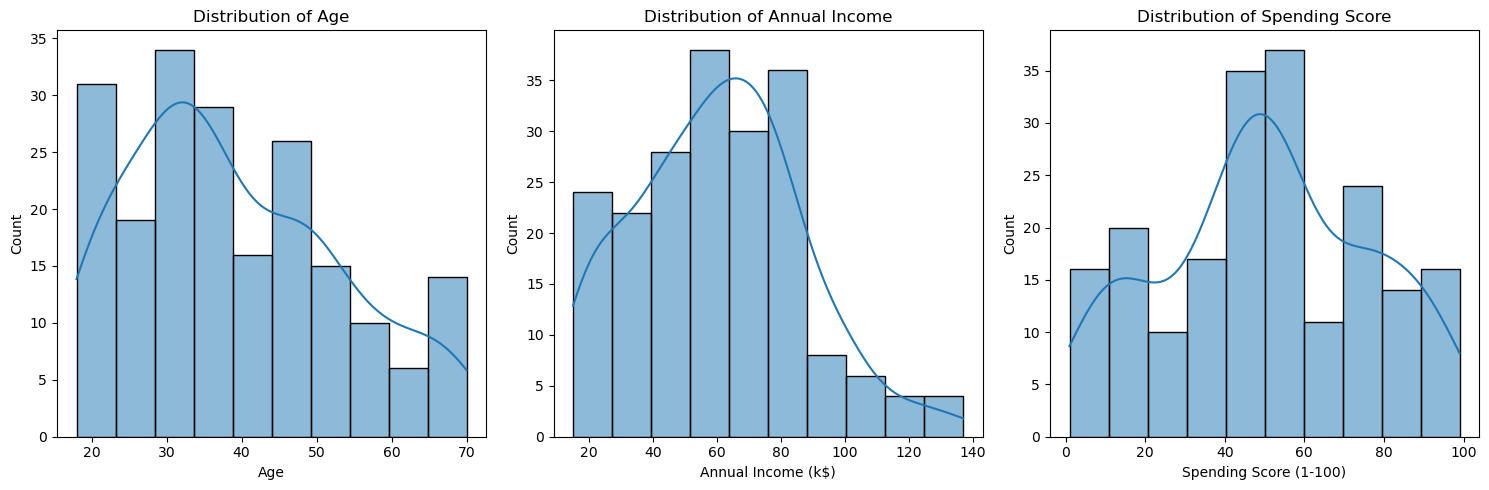

In [9]:
# Visualize distributions of relevant features (Age, Annual Income, Spending Score)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_mall['Age'], bins=10, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df_mall['Annual Income (k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df_mall['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.tight_layout()
plt.show()


In [11]:

# --- 3. Feature Selection and Scaling ---
# Features for clustering based on the task description and dataset content:
# 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Scale the features - crucial for K-Means as it uses distance measures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures scaled successfully.")
print("First 5 rows of scaled data (Numpy array):")
print(X_scaled[:5])



Features scaled successfully.
First 5 rows of scaled data (Numpy array):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


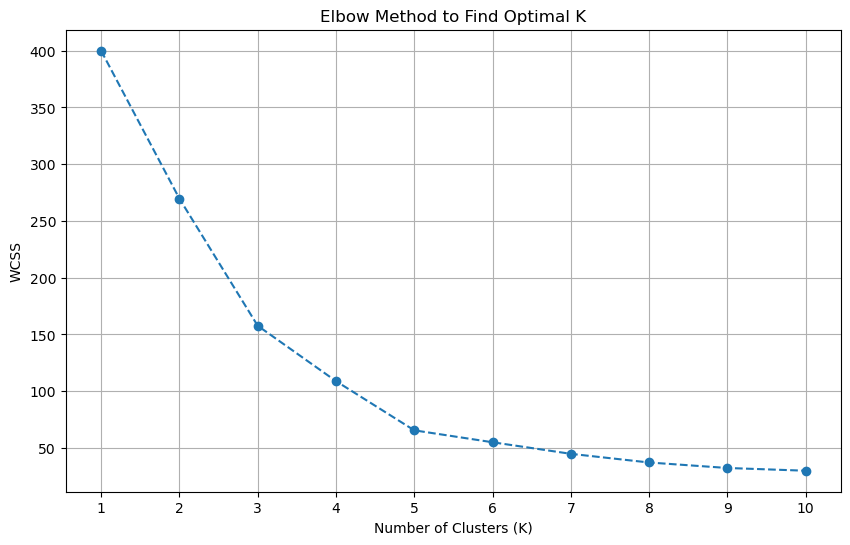


Elbow Method plot displayed. Look for the 'elbow' point to choose K.


In [13]:
# --- 4. Determine Optimal Number of Clusters (Elbow Method) ---
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
print("\nElbow Method plot displayed. Look for the 'elbow' point to choose K.")
# A common 'elbow' point for this dataset is typically 5.
optimal_k = 5 # Based on common findings for this dataset, but verify from your plot.



In [15]:

# --- 5. Apply K-Means Clustering ---
print(f"\nApplying K-Means with {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original DataFrame
df_mall['Cluster'] = clusters
print(f"Clusters assigned to customers. First 5 rows with new 'Cluster' column:")
print(df_mall.head())



Applying K-Means with 5 clusters...
Clusters assigned to customers. First 5 rows with new 'Cluster' column:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


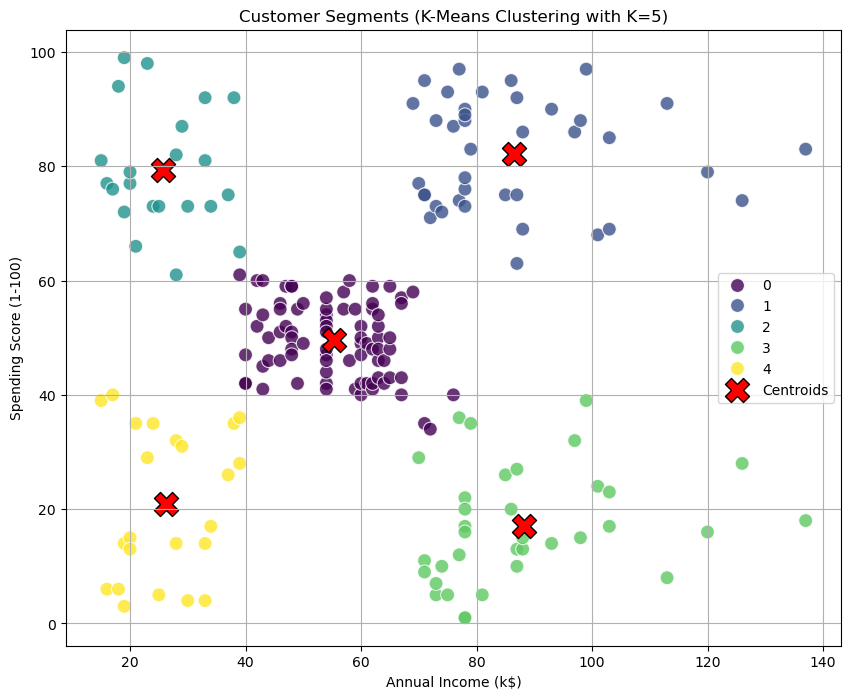

In [17]:
# --- 6. Visualize the Clusters ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df_mall,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolors='black')
plt.title(f'Customer Segments (K-Means Clustering with K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [19]:

# --- 7. Analyze Cluster Characteristics ---
print("\nCluster Characteristics (Mean values):")
print(df_mall.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

print("\nK-Means Clustering Task Completed.")


Cluster Characteristics (Mean values):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

K-Means Clustering Task Completed.
